## Importing packages and modules

In [21]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


import pickle
import yaml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

In [22]:
print(os.getcwd())
training = True

c:\Users\balaj\Desktop\Projects\Predictive_Maintenance-NASA_Turbofan_Jet_Engine\FD001 Analysis


In [23]:
# Importing and refreshing modules
import importlib
import preprocess

importlib.reload(preprocess)
from preprocess import Preprocessor, Charting


if training == True:
    p = Preprocessor()
else:
    #  Load the model from the pickle file
    with open('./saved_scalers/minmaxscaler.pkl', 'rb') as file:
        saved_scaler = pickle.load(file)
    p = Preprocessor(saved_scaler)
c = Charting()


In [24]:
# Loading data
train = pd.read_table("../Data/train_FD001.txt", sep=' ', header=None)

## Cleaning and Preprocessing

In [25]:
# Renaming columns
train = p.rename_columns(train)
train.head()

,unit,cycles,ops1,ops2,ops3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [26]:
# Dropping empty columns
train = train.dropna(axis=1, how='all')
list(train.isna().sum()) # Checking for missing values in each column

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

It is important to understand the source of our data here. The data is the result of a simulation and therefore outliers due to data entry errors or environmental factors are ruled out. Outlier Sensor values could hold key information about the health of the engine. Thus we will not remove them. 

In [27]:
train.describe()

,unit,cycles,ops1,ops2,ops3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [28]:
# Dropping cols where the min and max are same. i.e. No information is gained
train = p.drop_no_info_cols(train)

In [29]:
# Creating RUL column
train = p.create_rul_col(train)
p.update_col_groups(train)


,unit,cycles,rul,ops1,ops2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,1,1,191,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,190,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,189,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,188,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,187,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,4,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,100,197,3,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,100,198,2,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,100,199,1,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


In [30]:
c.plot_max_cycles_dist(train)

#### Clipping/Log transform

In [31]:
px.histogram(train['rul'], title="Histogram of RUL")

We find that the the distribution is right skewed. This is distort out prediction as very few units have max cycles above 240. So us try clipping or log transform to account for the skew. Also it is better to underestimate RUL than to overestimate due to safety reasons.

In [32]:
px.histogram(np.log1p(train['rul']), title="Histogram of log(RUL)")


Taking the log transform has pushed the weight of the graph to the right. This is not ideal as the model would learn to predict values in the  extreme right and fail to predict the smaller values. Let us try clipping. 

In [33]:
px.histogram(train['rul'].clip(upper=190))

In [34]:
# Clipping
train['rul'] = train['rul'].clip(upper=190)

In [35]:
# Let us normalize the operating setting and sensor values for each unit
train_norm = p.normalize_predictors(train, cols=['cycles']+p.get_op_setting_cols()+p.get_sensor_cols())

# Assuming all the sensor variation is similar in all units, let us group by cycles and take mean
grouped_train = p.group_by_rul(train, cols=(p.op_setting_cols+p.sensor_cols))

In [36]:
grouped_train

,ops1,ops2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,unit,cycles
rul,,,,,,,,,,,,,,,,,,,
0,0.000044,-5.000000e-05,643.721800,1602.499000,1430.873200,21.610000,551.361700,2388.246300,9099.359600,48.179800,519.671500,2388.251800,8168.124500,8.524108,396.600000,38.402200,23.053391,100,206.310000
1,-0.000218,-5.000000e-06,643.714700,1602.184500,1429.019800,21.610000,551.427200,2388.239600,9099.609300,48.170200,519.790400,2388.239500,8167.558400,8.525559,396.250000,38.440600,23.064854,100,205.310000
2,-0.000173,3.500000e-05,643.683700,1602.212900,1428.166200,21.610000,551.498500,2388.233000,9098.004700,48.149500,519.773700,2388.232200,8166.927900,8.519881,396.160000,38.460600,23.074655,100,204.310000
3,0.000053,-3.500000e-05,643.627500,1601.869400,1429.034000,21.610000,551.573600,2388.226000,9097.151900,48.105600,519.866100,2388.225200,8166.301200,8.517111,396.100000,38.449700,23.072819,100,203.310000
4,-0.000176,-8.000000e-06,643.602300,1602.679500,1427.540600,21.610000,551.613200,2388.215700,9095.834400,48.105900,519.944200,2388.218800,8165.420400,8.515365,396.090000,38.476900,23.084228,100,202.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,-0.000152,-6.417910e-05,642.384925,1586.980149,1402.775970,21.609701,553.903284,2388.060896,9055.772090,47.352239,521.936866,2388.050448,8137.760149,8.422227,392.477612,38.945522,23.360722,67,42.119403
187,-0.000245,-6.472849e-21,642.359254,1586.592388,1403.716418,21.609104,553.948209,2388.059403,9056.319701,47.345373,521.920597,2388.061493,8137.487015,8.416901,392.373134,38.918806,23.361082,67,41.119403
188,-0.000225,-1.562500e-06,642.383125,1586.933594,1402.338281,21.610000,554.029219,2388.055156,9056.008281,47.325469,521.961875,2388.053281,8138.419531,8.415617,392.328125,38.935469,23.372406,64,42.000000


In [37]:
# Plotting average of sensor values
c.plot_avg_sensor_data(grouped_train, p.sensor_cols)

In [38]:
# Plotting sensor values for a specific unit
specific_unit = 5
train_specific_unit = train[train['unit'] == specific_unit]
px.line(train_specific_unit, x='rul', y=p.sensor_cols, title=f'Sensor values vs RUL for unit {specific_unit}')

We observe that the relationship between the features is linear, so we will not go ahead with PCA. 

In [39]:
# Observing standard deviation of sensor values
grouped_train_by_unit = train.groupby('unit')
grouped_train_by_unit.std()

,cycles,rul,ops1,ops2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
unit,,,,,,,,,,,,,,,,,,,
1,55.569776,55.560824,0.001953,0.000282,0.486795,5.759776,8.565610,0.000000,0.910414,0.070914,4.911853,0.268346,0.749176,0.076960,5.563129,0.034125,1.475661,0.166998,0.105101
2,82.993976,63.610312,0.002320,0.000298,0.560214,6.596730,9.737248,0.002491,0.940728,0.063001,12.491827,0.293672,0.799368,0.063861,8.683012,0.041128,1.647280,0.199332,0.114796
3,51.816986,51.816986,0.002145,0.000290,0.474190,6.386222,8.610126,0.001482,0.733983,0.039957,35.196825,0.242410,0.594788,0.041219,29.439715,0.036620,1.570773,0.166112,0.104734
4,54.703748,54.703748,0.002033,0.000286,0.441446,6.109152,7.737463,0.000727,0.708327,0.032530,36.571690,0.222724,0.530158,0.034819,30.691780,0.031947,1.602848,0.159302,0.093804
5,77.797815,63.494937,0.002119,0.000279,0.551542,7.060648,9.782341,0.002503,0.895734,0.055522,21.404031,0.285740,0.753298,0.056445,16.480153,0.038658,1.740057,0.187133,0.112705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97.139076,62.879439,0.002088,0.000277,0.501021,5.853261,8.791019,0.001086,0.864553,0.060982,6.994209,0.260853,0.707257,0.060729,4.179830,0.035970,1.513053,0.180457,0.106394
97,58.456537,57.928972,0.002112,0.000288,0.473922,6.164926,7.668898,0.000993,0.671497,0.040905,40.436586,0.208634,0.534132,0.036208,33.877407,0.034042,1.561475,0.170961,0.093300
98,45.177428,45.177428,0.002144,0.000275,0.525905,6.312261,9.751562,0.001378,0.898644,0.078068,5.040509,0.297087,0.774711,0.074219,5.859512,0.035768,1.407692,0.177168,0.107449


<module 'matplotlib.pyplot' from 'c:\\Users\\balaj\\anaconda3\\envs\\predictive_manintenance_project\\Lib\\site-packages\\matplotlib\\pyplot.py'>

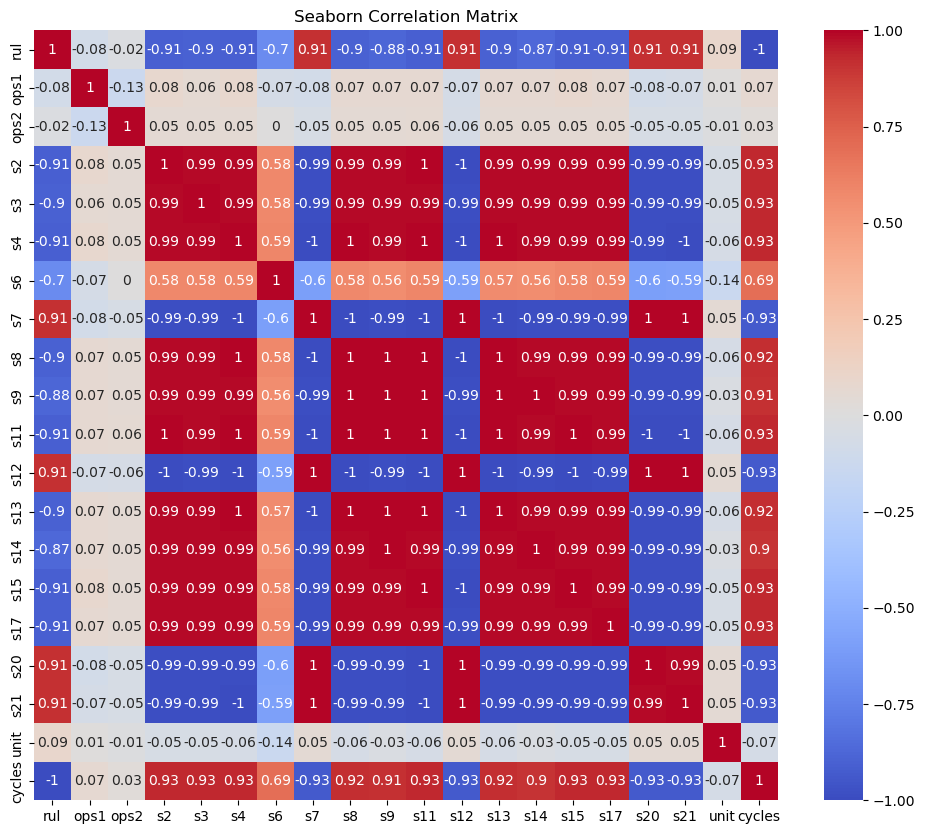

In [40]:
# Plotting corrrelation values
c.plot_corr_heatmap(grouped_train)

We see that the most sensor values show strong postive or strong negative correlation with the RUL column.

### Scaling

In [41]:
# Let us normalize the operating setting and sensor values for each unit
train_norm = p.normalize_predictors(train, [col for col in train.columns if col not in ['unit','rul']])

In [42]:
if training == True:
    with open('./saved_scalers/minmaxscaler.pkl', 'wb') as file:
        pickle.dump(p.get_minmaxscaler(), file)

### PCA

In [43]:
# Standardizing data
train_std = p.standardize_predictors(train, [col for col in train.columns if col not in ['unit','rul']])

if training == True:
    with open('./saved_scalers/stdscaler.pkl', 'wb') as file:
        pickle.dump(p.get_stdscaler(), file)


# Performing PCA for dimensionality reduction
predicting_cols = ['cycles'] + p.sensor_cols + p.op_setting_cols
pca = PCA()
pca.fit(train_std[predicting_cols])
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance) # 99% of the variance is explained by the first component

[0.52857248 0.64915693 0.70539782 0.7605273  0.81398168 0.83883458
 0.8617244  0.88217769 0.90137722 0.91837749 0.9344756  0.94863135
 0.96007504 0.97090464 0.98068449 0.99025983 0.99837385 1.        ]


In [44]:
fig = px.line(x=range(1, len(cumulative_variance)+1), y=cumulative_variance*100, title="PCA components vs Variance")   
fig.update_traces(mode='lines+markers')
fig.update_layout(
    xaxis_title="Components",
    yaxis_title="Variance"
)

In [45]:
# Fitting and Transforming PCA
pca = PCA(13)
X_pca = pca.fit_transform(train_std[predicting_cols])

with open("./saved_models/PCA/pca_model.pkl", 'wb') as file:
    pickle.dump(pca, file)

### Data Splitting and Storing

In [46]:
# Saving Processed data
y = train_norm['rul']

dataframe_y = pd.DataFrame(y)
dataframe_X_pca = pd.DataFrame(X_pca)
dataframe_y.to_parquet("../Data/Processed/y.parquet", engine="pyarrow", index=False)
dataframe_X_pca.to_parquet("../Data/Processed/X_pca.parquet", engine="pyarrow", index=False)


In [47]:
# Split the normalized data into X and y
X_npca = train_norm.drop(columns=['rul', 'unit'])

# Split the data into training and testing sets
X_train_npca, X_test_npca, y_train_npca, y_test_npca = train_test_split(X_npca, y, test_size=0.2, random_state=42)

In [48]:
# Splitting the PCA data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

## Model Training

Before using the PCA data let us see feature importance for which actual features have to be used.

### Random Forest - Non-PCA 

In [49]:
%%time

# Create the Random Forest model
rf_non_pca = RandomForestRegressor()

# Train the model
rf_non_pca.fit(X_train_npca, y_train_npca)

# Make predictions
y_pred = rf_non_pca.predict(X_test_npca)

# Evaluate the model
mse = mean_squared_error(y_test_npca, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_npca, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Root Mean Squared Error: 27.100878491273832
R-squared: 0.7886912162377823
CPU times: total: 18.2 s
Wall time: 17.9 s


In [50]:
feature_importances_df = pd.DataFrame({'feature':list(X_train_npca.columns),'feature_imp':list(rf_non_pca.feature_importances_)})
px.bar(feature_importances_df, x='feature', y='feature_imp', title='Feature Importances of Random Forest Model')

We observe that the columns: cycles, sensor 11, sensor 4 and sensor 9 are the most important features in predicting the RUL.

### Random Forest - PCA

#### Base Model without optimized hyperparameters

In [51]:
%%time

# Create the Random Forest model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Root Mean Squared Error: 27.120152705543333
R-squared: 0.7883905426582667
CPU times: total: 20.9 s
Wall time: 21 s


#### Hyperparameters tuning with GridSearchCV

In [53]:
%%time
if training == True:    
    
    # Create the Random Forest model
    rf_model = RandomForestRegressor()

    # Define the parameter grid
    param_grid = { # The param grid has been reduced after running the grid search multiple times during training
        'n_estimators': [500, 600],
        'max_depth': [10, 12],
        'min_samples_split': [10, 15],
        'min_samples_leaf': [14, 16],
        'bootstrap': [True]
    }

    # Create the GridSearchCV object
    grid_search = GridSearchCV(
        estimator=rf_model, 
        param_grid=param_grid, 
        cv=5, 
        scoring='neg_mean_squared_error', 
        verbose=1, 
        n_jobs=-1
    )

    # Fit the GridSearchCV object to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f'Best Parameters: {best_params}')
    print(f'Best Score: {best_score}')

    # Train the model with the best parameters
    best_rf_model = grid_search.best_estimator_
    best_rf_model.fit(X_train, y_train)

else:
    # Load the model from the pickle file
    with open('./saved_models/Random Forest/rf_model.pkl', 'rb') as file:
        best_rf_model = pickle.load(file)

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model on validation set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 14, 'min_samples_split': 15, 'n_estimators': 500}
Best Score: -715.8226431163023
Root Mean Squared Error: 26.84196283253325
R-squared: 0.7927095216943669
CPU times: total: 2min 16s
Wall time: 9min 3s


Though the RMSE and R squared values are lower compared to rf model without PCA we will use this model as it would generalize better.

In [ ]:
comparing_pred_df = pd.DataFrame(columns=['y_ground', 'y_rf', 'y_xgb'])
comparing_pred_df['y_ground'] = y_test
comparing_pred_df['y_rf'] = y_pred

In [56]:
# Saving the Random Forest model and parameters
if training == True:
    with open('./saved_models/Random Forest/rf_model.pkl', 'wb') as f:
        pickle.dump(best_rf_model, f)
        
    with open('./saved_models/Random Forest/rf_hyperparameters.yaml', 'w') as f:
        yaml.dump(best_rf_model.get_params(), f)

### XGBoost

In [57]:
%%time
if training==True:
    

    # Create the XGBoost model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

    # Define the parameter grid
    param_grid = {
        'n_estimators': [25, 50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0]
    }

    # Create the GridSearchCV object
    grid_search = GridSearchCV(
        estimator=xgb_model, 
        param_grid=param_grid, 
        cv=5, 
        scoring='neg_mean_squared_error', 
        verbose=1, 
        n_jobs=-1
    )

    # Fit the GridSearchCV object to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f'Best Parameters: {best_params}')
    print(f'Best Score: {best_score}')

    # Train the model with the best parameters
    best_xgb_model = grid_search.best_estimator_
    best_xgb_model.fit(X_train, y_train)

    # Predictions
    y_pred = best_xgb_model.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'Root Mean Squared Error: {rmse}')
    print(f'R-squared: {r2}')



Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Score: -709.8291259765625
Root Mean Squared Error: 26.81728563971438
R-squared: 0.7930904626846313
CPU times: total: 12.3 s
Wall time: 1min 23s


In [58]:
# Saving the xgboost model and parameters
if training == True:
    with open('./saved_models/XGBoost/xgb_model.pkl', 'wb') as f:
        pickle.dump(best_xgb_model, f)
        
    with open('./saved_models/XGBoost/xgb_hyperparameters.yaml', 'w') as f:
        yaml.dump(best_xgb_model.get_params(), f)

In [59]:
comparing_pred_df['y_xgb'] = y_pred

In [60]:
comparing_pred_df

,y_ground,y_rf,y_xgb,y_nn
13857,135,123.841877,114.670364,NaN
1710,2,6.821192,8.903220,NaN
9278,190,183.496874,176.377960,NaN
10786,0,0.901207,2.903375,NaN
19709,178,118.139589,114.048607,NaN
...,...,...,...,...
8260,184,179.377576,172.216858,NaN
20527,103,110.083870,106.844879,NaN
16016,121,135.535010,136.238693,NaN
2271,104,122.626877,121.571770,NaN
